In [ ]:
%pip install pandas numpy matplotlib seaborn scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 6.1 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 11.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 4.4 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 11.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 4.6 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 9.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 4.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16/16 [seaborn]5/16 [seaborn]ib]n]

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Train shape: (2000, 13)
Test shape: (500, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gig_ID                 2000 non-null   object 
 1   Venue_ID               2000 non-null   object 
 2   Show_DateTime          2000 non-null   object 
 3   Day_of_Week            2000 non-null   int64  
 4   Volume_Level           1819 non-null   float64
 5   Ticket_Price           2000 non-null   object 
 6   Crowd_Size             1960 non-null   float64
 7   Opener_Rating          2000 non-null   int64  
 8   Weather                2000 non-null   object 
 9   Moon_Phase             2000 non-null   object 
 10  Band_Outfit            2000 non-null   object 
 11  Merch_Sales_Post_Show  2000 non-null   int64  
 12  Crowd_Energy           2000 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 203.3+ KB


/var/folders/2f/vs0p3bp12mvg2870k7c_rmr80000gn/T/ipykernel_10804/2223488774.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(median_val, inplace=True)
/var/folders/2f/vs0p3bp12mvg2870k7c_rmr80000gn/T/ipykernel_10804/2223488774.py:77: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

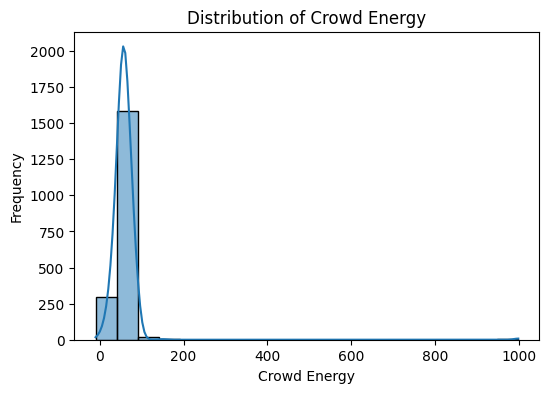

Final Train shape: (1909, 14)
Final Test shape: (500, 13)


Gig_ID                   0
Venue_ID                 0
Show_DateTime            0
Day_of_Week              0
Volume_Level             0
Ticket_Price             0
Crowd_Size               0
Opener_Rating            0
Weather                  0
Moon_Phase               0
Band_Outfit              0
Merch_Sales_Post_Show    0
Crowd_Energy             0
Ticket_Price_USD         0
dtype: int64

In [5]:
# =================================================
# STAGE 1: DATA CLEANING & WRANGLING
# =================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

# -----------------------------
# LOAD DATA
# -----------------------------
train_df = pd.read_csv("data/tour_logs_train.csv")
test_df  = pd.read_csv("data/tour_logs_test_input.csv")

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

# -----------------------------
# BASIC INFO
# -----------------------------
train_df.info()

# -----------------------------
# DATE CLEANING
# -----------------------------
if "Date" in train_df.columns:
    train_df["Date"] = pd.to_datetime(train_df["Date"], errors="coerce")

if "Date" in test_df.columns:
    test_df["Date"] = pd.to_datetime(test_df["Date"], errors="coerce")

# -----------------------------
# CURRENCY CONVERSION → USD
# -----------------------------
def convert_to_usd(price):
    if pd.isna(price):
        return np.nan
    price = str(price).strip()
    try:
        if price.startswith("$"):
            return float(price.replace("$", ""))
        elif price.startswith("£"):
            return float(price.replace("£", "")) * 1.27
        elif price.startswith("€"):
            return float(price.replace("€", "")) * 1.09
        else:
            return float(price)
    except:
        return np.nan

if "Ticket_Price" in train_df.columns:
    train_df["Ticket_Price_USD"] = train_df["Ticket_Price"].apply(convert_to_usd)

if "Ticket_Price" in test_df.columns:
    test_df["Ticket_Price_USD"] = test_df["Ticket_Price"].apply(convert_to_usd)

# -----------------------------
# HANDLE MISSING VALUES (SAFE WAY)
# -----------------------------

# numeric columns separately
train_num_cols = train_df.select_dtypes(include=["int64", "float64"]).columns
test_num_cols  = test_df.select_dtypes(include=["int64", "float64"]).columns

# replace zero with NaN
train_df[train_num_cols] = train_df[train_num_cols].replace(0, np.nan)
test_df[test_num_cols]   = test_df[test_num_cols].replace(0, np.nan)

# fill NaNs using TRAIN medians only (NO LEAKAGE)
for col in train_num_cols:
    median_val = train_df[col].median()
    train_df[col].fillna(median_val, inplace=True)
    if col in test_df.columns:
        test_df[col].fillna(median_val, inplace=True)

# -----------------------------
# OUTLIER REMOVAL (TRAIN ONLY)
# -----------------------------
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

for col in train_num_cols:
    if col != "Crowd_Energy":
        train_df = remove_outliers_iqr(train_df, col)

# -----------------------------
# TARGET VARIABLE CHECK
# -----------------------------
plt.figure(figsize=(6,4))
sns.histplot(train_df["Crowd_Energy"], bins=20, kde=True)
plt.title("Distribution of Crowd Energy")
plt.xlabel("Crowd Energy")
plt.ylabel("Frequency")
plt.show()

# -----------------------------
# FINAL CHECK
# -----------------------------
print("Final Train shape:", train_df.shape)
print("Final Test shape:", test_df.shape)

train_df.isna().sum()


Using venue column: Venue_ID


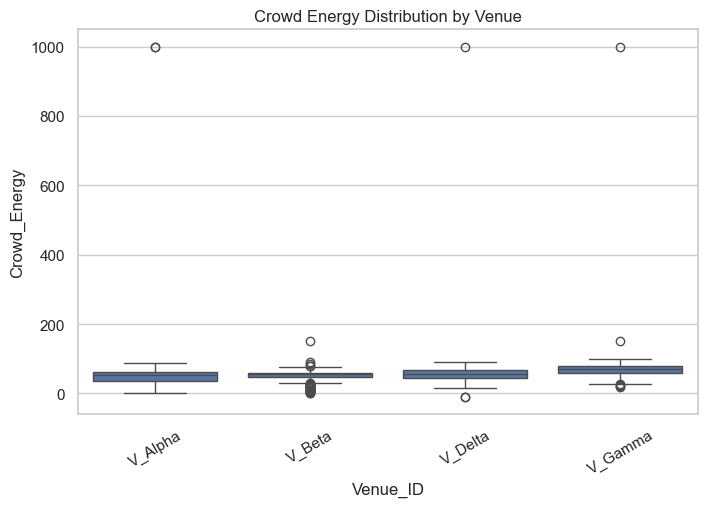

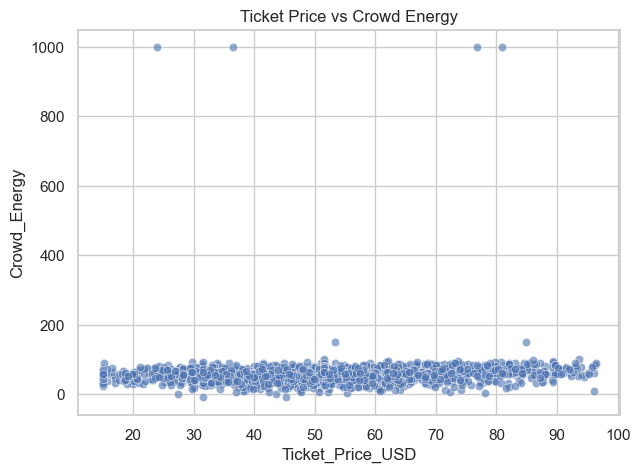

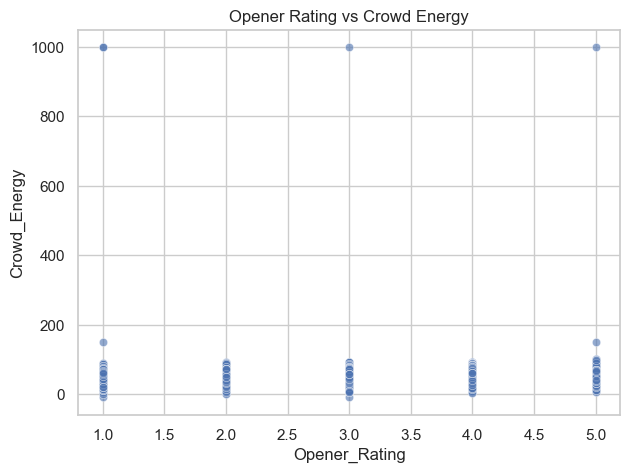

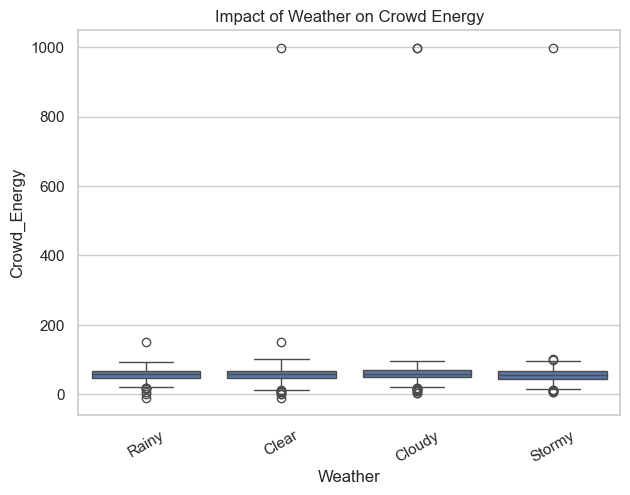

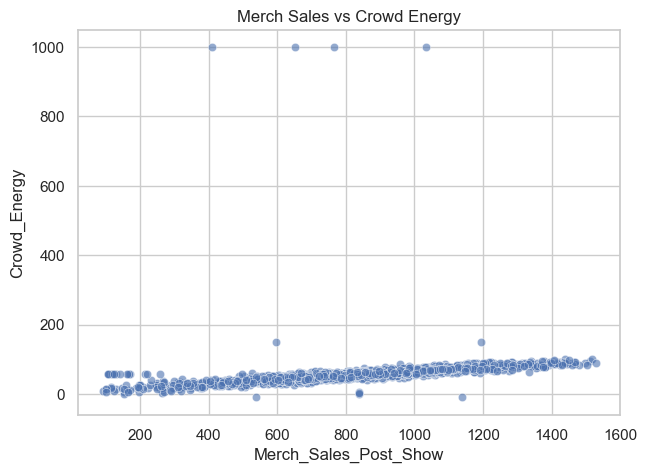

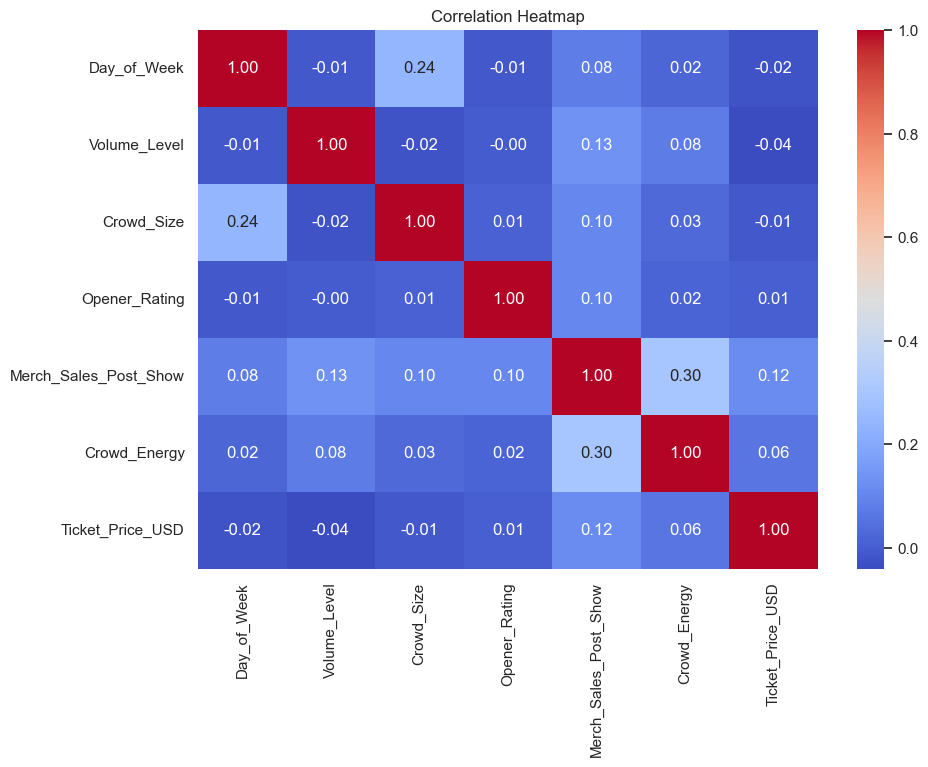

In [7]:
# =================================================
# STAGE 2: EXPLORATORY DATA ANALYSIS (EDA)
# =================================================

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# -----------------------------
# Identify correct venue column
# -----------------------------
venue_col = None
for col in train_df.columns:
    if "venue" in col.lower():
        venue_col = col
        break

print("Using venue column:", venue_col)

# -----------------------------
# 1. Crowd Energy by Venue
# -----------------------------
if venue_col:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=train_df, x=venue_col, y="Crowd_Energy")
    plt.title("Crowd Energy Distribution by Venue")
    plt.xticks(rotation=30)
    plt.show()

# -----------------------------
# 2. Ticket Price vs Crowd Energy
# -----------------------------
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=train_df,
    x="Ticket_Price_USD",
    y="Crowd_Energy",
    alpha=0.6
)
plt.title("Ticket Price vs Crowd Energy")
plt.show()

# -----------------------------
# 3. Opener Rating vs Crowd Energy
# -----------------------------
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=train_df,
    x="Opener_Rating",
    y="Crowd_Energy",
    alpha=0.6
)
plt.title("Opener Rating vs Crowd Energy")
plt.show()

# -----------------------------
# 4. Weather vs Crowd Energy
# -----------------------------
if "Weather" in train_df.columns:
    plt.figure(figsize=(7,5))
    sns.boxplot(data=train_df, x="Weather", y="Crowd_Energy")
    plt.title("Impact of Weather on Crowd Energy")
    plt.xticks(rotation=30)
    plt.show()

# -----------------------------
# 5. Day of Week vs Crowd Energy
# -----------------------------
if "Date" in train_df.columns:
    train_df["Day_of_Week"] = train_df["Date"].dt.day_name()

    plt.figure(figsize=(8,5))
    sns.boxplot(
        data=train_df,
        x="Day_of_Week",
        y="Crowd_Energy",
        order=[
            "Monday","Tuesday","Wednesday",
            "Thursday","Friday","Saturday","Sunday"
        ]
    )
    plt.title("Crowd Energy by Day of Week")
    plt.xticks(rotation=30)
    plt.show()

# -----------------------------
# 6. Merch Sales vs Crowd Energy
# -----------------------------
if "Merch_Sales_Post_Show" in train_df.columns:
    plt.figure(figsize=(7,5))
    sns.scatterplot(
        data=train_df,
        x="Merch_Sales_Post_Show",
        y="Crowd_Energy",
        alpha=0.6
    )
    plt.title("Merch Sales vs Crowd Energy")
    plt.show()

# -----------------------------
# 7. Correlation Heatmap
# -----------------------------
numeric_cols = train_df.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(10,7))
sns.heatmap(
    numeric_cols.corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Heatmap")
plt.show()


In [8]:
# =================================================
# STAGE 3: FEATURE ENGINEERING & MODELING (ONE CELL)
# =================================================

# -----------------------------
# 1. TARGET & FEATURES
# -----------------------------
y = train_df["Crowd_Energy"]
X = train_df.drop(columns=["Crowd_Energy"])

# -----------------------------
# 2. ENCODE CATEGORICAL VARIABLES
# -----------------------------
X = pd.get_dummies(X, drop_first=True)

X_test = test_df.copy()
X_test = pd.get_dummies(X_test, drop_first=True)

# Align train & test columns
X, X_test = X.align(X_test, join="left", axis=1, fill_value=0)

print("Train features shape:", X.shape)
print("Test features shape:", X_test.shape)

# -----------------------------
# 3. TRAIN–VALIDATION SPLIT
# -----------------------------
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train split:", X_train.shape)
print("Validation split:", X_val.shape)

# -----------------------------
# 4. MODEL TRAINING
# -----------------------------
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# -----------------------------
# 5. MODEL EVALUATION
# -----------------------------
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_pred = model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print("Validation MAE:", round(mae, 2))
print("Validation RMSE:", round(rmse, 2))

# -----------------------------
# 6. FINAL MODEL (FULL DATA)
# -----------------------------
final_model = LinearRegression()
final_model.fit(X, y)

# -----------------------------
# 7. TEST PREDICTIONS (PREVIEW ONLY)
# -----------------------------
test_predictions = final_model.predict(X_test)

print("Sample test predictions:")
print(test_predictions[:10])


Train features shape: (1909, 4900)
Test features shape: (500, 4900)
Train split: (1527, 4900)
Validation split: (382, 4900)
Validation MAE: 10.98
Validation RMSE: 52.6
Sample test predictions:
[ 49.41448943  54.63689342 -55.53465394  51.55776839  55.45227664
  60.57022863  63.34889424  67.84074182  12.00998469  25.07686598]


In [9]:
# =================================================
# STAGE 4: EXPORT TEST PREDICTIONS
# =================================================

predictions_df = pd.DataFrame({
    "Gig_ID": test_df["Gig_ID"] if "Gig_ID" in test_df.columns else range(len(test_predictions)),
    "Predicted_Crowd_Energy": test_predictions
})

predictions_df.to_csv("predictions.csv", index=False)

print("predictions.csv file created successfully!")
predictions_df.head()


predictions.csv file created successfully!


,Gig_ID,Predicted_Crowd_Energy
0,Gig_0000,49.414489
1,Gig_0001,54.636893
2,Gig_0002,-55.534654
3,Gig_0003,51.557768
4,Gig_0004,55.452277
